# Supplementary Figure 4 - Plot cell count by reproducibility score

Related to Figure 1

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

source("viz_themes.R")
source("plotting_functions.R")
source("data_functions.R")

In [2]:
output_figure_base <- file.path("figures", "supplementary", "figureS4_cellcount_death")
extensions <- c(".png", ".pdf")

In [3]:
# Load data
count_file <- file.path("..", "1.Data-exploration", "results", "cell_count_and_death.tsv.gz")

count_cols <- readr::cols(
  Metadata_Assay_Plate_Barcode = readr::col_character(),
  Metadata_Well = readr::col_character(),
  Metadata_Plate_Map_Name = readr::col_character(),
  replicate_name = readr::col_character(),
  Metadata_dose_recode = readr::col_double(),
  Metadata_broad_sample = readr::col_character(),
  pert_iname = readr::col_character(),
  moa = readr::col_character(),
  Metadata_Plate = readr::col_character(),
  cell_count = readr::col_double(),
  batch = readr::col_character(),
  plate_map_name = readr::col_character(),
  well_position = readr::col_character(),
  broad_sample = readr::col_character(),
  mg_per_ml = readr::col_double(),
  mmoles_per_liter = readr::col_double(),
  solvent = readr::col_character(),
  Metadata_pert_well = readr::col_character(),
  cell_health_modz_target_vb_percent_dead = readr::col_double()
)

count_df <- readr::read_tsv(count_file, col_type = count_cols)

count_df$dose <- factor(count_df$dose, levels = dose_order)

print(dim(count_df))
head(count_df, 3)

[1] 35081    33


Metadata_Assay_Plate_Barcode,Metadata_Well,Metadata_Plate_Map_Name,replicate_name,Metadata_dose_recode,Metadata_broad_sample,pert_iname,moa,Metadata_Plate,cell_count,⋯,assay,normalization,category,pass_thresh,neg_log_10_p_val,dose,Metadata_pert_well,cell_health_modz_target_vb_percent_dead,cell_health_modz_target_vb_percent_dead_only,cell_health_modz_target_vb_percent_live
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<lgl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
SQ00015211,A13,C-7161-01-LM6-027,replicate_3294,6,BRD-A92630576-050-24-1,trimebutine,opioid receptor agonist,SQ00015211,2146,⋯,Cell Painting,spherized,all_data,FALSE,0.4213608,10 uM,A13,0.04705638,0.1507715,-0.0484772
SQ00015053,A13,C-7161-01-LM6-027,replicate_3300,6,BRD-A92630576-050-24-1,trimebutine,opioid receptor agonist,SQ00015053,2457,⋯,Cell Painting,spherized,all_data,FALSE,0.4213608,10 uM,A13,0.04705638,0.1507715,-0.0484772
SQ00015054,A13,C-7161-01-LM6-027,replicate_3306,6,BRD-A92630576-050-24-1,trimebutine,opioid receptor agonist,SQ00015054,2482,⋯,Cell Painting,spherized,all_data,FALSE,0.4213608,10 uM,A13,0.04705638,0.1507715,-0.0484772


In [4]:
count_a_gg <- (
    ggplot(
        count_df,
        aes(x = cell_count, y = median_score, color = cell_health_modz_target_vb_percent_dead_only),
        alpha = 0.5
    )
    + xlab("Cell count")
    + ylab("Pairwise replicate Pearson correlation")
    + geom_point(size = 0.6)
    + figure_theme
    + scale_color_gradientn(name="Cell health\nprediction:\nCell death", colours = rev(terrain.colors(7)))
)

count_b_gg <- (
    ggplot(
        count_df,
        aes(x = cell_count, y = median_score, color = cell_health_modz_target_vb_percent_dead_only),
        alpha = 0.5
    )
    + xlab("Cell count")
    + ylab("Pairwise replicate Pearson correlation")
    + geom_bin2d(bins = 50)
    + scale_fill_viridis_c(name = "Density", option = "magma")
    + figure_theme
)

count_c_gg <- (
    ggplot(
        count_df,
        aes(x = cell_count, y = median_score, color = cell_health_modz_target_vb_percent_dead_only),
        alpha = 0.5
    )
    + facet_grid("~dose")
    + xlab("Cell count")
    + ylab("Pairwise replicate Pearson correlation")
    + geom_point(size = 0.4)
    + figure_theme
    + scale_color_gradientn(name="Cell health\nprediction:\nCell death", colours = rev(terrain.colors(7)))
)

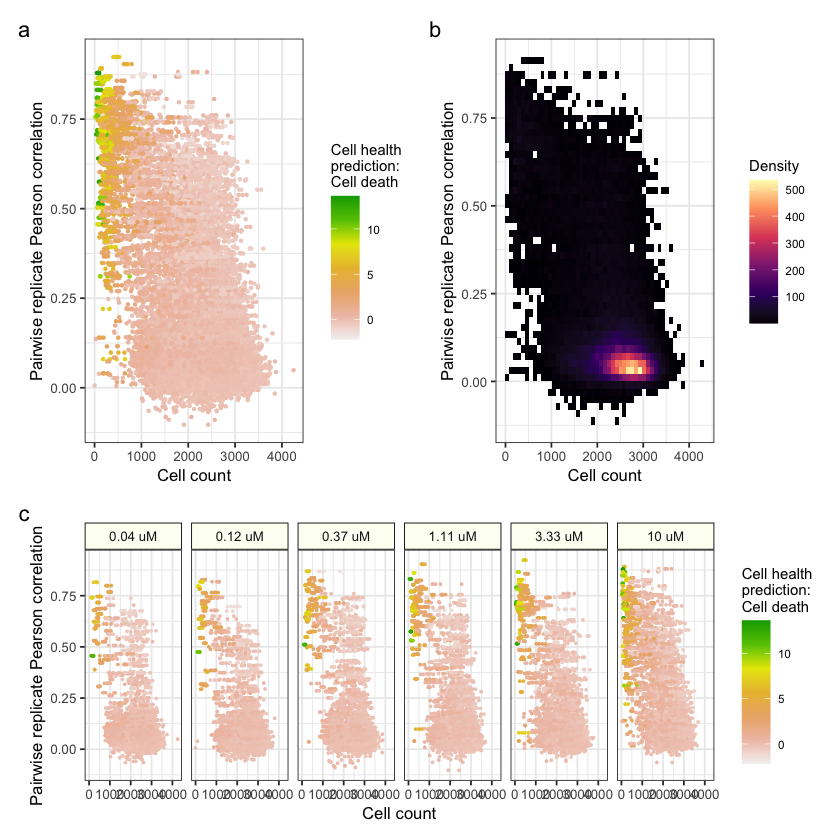

In [5]:
count_gg <- (
    (
        count_a_gg | count_b_gg
    ) / count_c_gg
)  + plot_layout(heights = c(1.75, 1)) + plot_annotation(tag_levels = "a")

for (extension in extensions) {
    output_file <- paste0(output_figure_base, extension)
    ggplot2::ggsave(output_file, count_gg, height = 7, width = 10, dpi = 500)
}

count_gg